In [66]:
import pandas as pd
import warnings
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [67]:
me_file = r"H:\fly\dataframe_data\mefeatures_100K.csv"

microenv_feature = pd.read_csv(me_file, dtype={1:str})
microenv_feature['soma_region'] = microenv_feature['soma_region'].str.replace(r'_(L|R)$', '', regex=True)
me_columns = [col for col in microenv_feature.columns if col.endswith('_me')]
single_columns = [item.replace('_me', '') for item in me_columns]
keep_columns1 = ['soma_region'] + me_columns 
keep_columns2 = ['soma_region'] + single_columns
me_feature = microenv_feature[keep_columns1]
single_feature = microenv_feature[keep_columns2]

# 1. MicroEnv vs Microenv

In [72]:
from sklearn.preprocessing import MinMaxScaler

group_means = me_feature.groupby('soma_region').mean(numeric_only=True)
group_means_reset = group_means.reset_index()
soma_region = group_means_reset['soma_region']
numerical_data = group_means_reset.drop(columns=['soma_region'])

scaler = MinMaxScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

group_means_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)
group_means_normalized['soma_region'] = soma_region
group_means_normalized.set_index('soma_region', inplace=True)

group_means_me = group_means_normalized
group_means_me

,Stems_me,Bifurcations_me,Branches_me,Tips_me,OverallWidth_me,OverallHeight_me,OverallDepth_me,Length_me,Volume_me,MaxEuclideanDistance_me,...,AverageParent-daughterRatio_me,AverageBifurcationAngleLocal_me,AverageBifurcationAngleRemote_me,HausdorffDimension_me,pc11_me,pc12_me,pc13_me,pca_vr1_me,pca_vr2_me,pca_vr3_me
soma_region,,,,,,,,,,,,,,,,,,,,,
AL,0.313859,0.435180,0.436851,0.435470,0.622492,0.473741,0.417525,0.524502,0.170084,0.573076,...,0.525822,0.717782,0.680290,0.442491,0.617617,0.229447,0.111316,0.286441,0.724482,0.577430
AME,0.125436,0.633334,0.639236,0.638922,1.000000,0.796715,0.488748,0.787623,0.331541,0.966069,...,0.816183,0.670409,0.652155,0.790303,0.561899,0.412251,0.018061,0.414972,0.596346,0.472214
AMMC,0.816897,0.190268,0.186987,0.184608,0.281651,0.226854,0.392582,0.233043,0.079484,0.319918,...,0.584921,0.717357,0.867915,0.299228,0.178109,0.252284,0.722697,0.540534,0.455628,0.405251
AOTU,0.005289,0.330058,0.327497,0.323335,0.519637,0.536432,0.592027,0.360349,0.059284,0.615858,...,0.872491,0.712030,0.799492,0.519679,0.338010,0.567992,0.389499,0.714085,0.298421,0.226735
ATL,0.000000,0.610410,0.606291,0.596963,0.711360,0.588394,0.583064,0.690250,0.129899,0.758401,...,0.709706,0.720617,0.607391,0.775277,0.532760,0.291761,0.255435,0.034869,0.966343,0.803975
AVLP,0.062677,0.847197,0.841384,0.827411,0.797428,0.592614,0.521941,0.893414,0.170052,0.830705,...,0.832585,0.848248,0.728401,0.932179,0.521934,0.391949,0.172345,0.036994,0.880437,0.995365
BU,0.000000,0.004296,0.000835,0.000000,0.479922,0.093616,0.179605,0.053446,0.000000,0.425644,...,0.051932,0.111102,0.000000,0.000000,1.000000,0.391335,0.000000,0.567821,0.594550,0.000000
CAN,0.000000,0.342037,0.335259,0.327197,0.902909,0.768254,0.572661,0.531037,0.098116,0.872302,...,0.481285,0.785263,0.609841,0.481414,0.395877,0.634116,0.123684,0.012820,0.965435,0.874789
CRE,0.000382,0.565275,0.557887,0.546166,0.639831,0.561828,0.539999,0.668044,0.106913,0.655390,...,0.716415,0.747684,0.610168,0.787495,0.482050,0.434443,0.172570,0.038465,0.887429,0.974664


In [77]:
regions = group_means_me.index.tolist()

corrs_me = []
for i in range(len(regions)):
    for j in range(len(regions)):
        x = group_means_me.loc[regions[i]]
        y = group_means_me.loc[regions[j]]
        r, p = pearsonr(x, y)
        corrs_me.append({
            'region_x': regions[i],
            'region_y': regions[j],
            'r': r,
            'p': p
        })

df_corr_me = pd.DataFrame(corrs_me)
df_corr_me

,region_x,region_y,r,p
0,AL,AL,1.000000,0.000000e+00
1,AL,AME,0.533084,7.312481e-03
2,AL,AMMC,0.113717,5.967514e-01
3,AL,AOTU,0.276404,1.910576e-01
4,AL,ATL,0.660523,4.430926e-04
...,...,...,...,...
1844,WED,SLP,0.948508,1.830794e-12
1845,WED,SMP,0.966062,2.025603e-14
1846,WED,SPS,0.944382,4.192353e-12
1847,WED,VES,0.839681,2.893260e-07


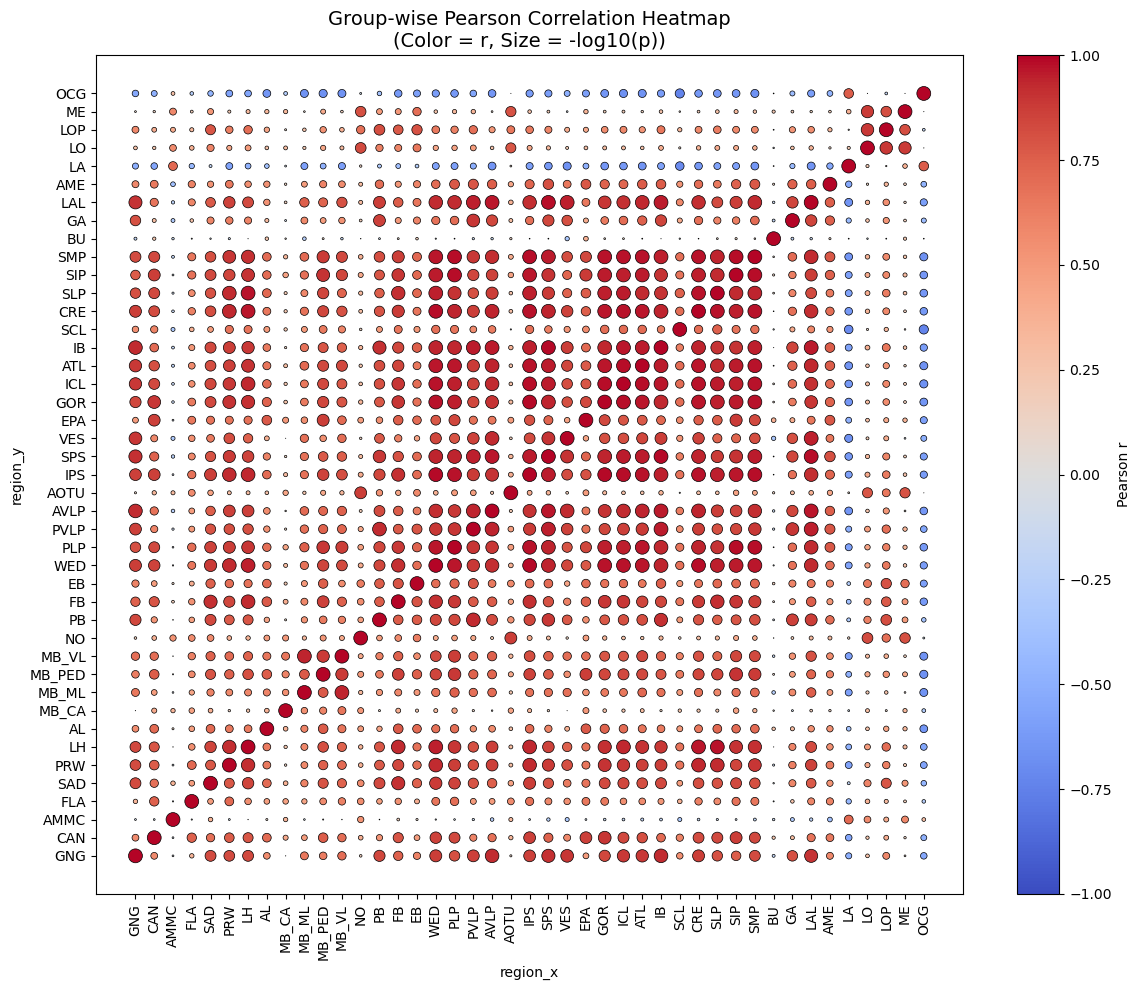

In [117]:
import matplotlib.colors as mcolors

region_order = [
    "GNG", "CAN", "AMMC", "FLA", "SAD", "PRW", "LH", "AL",
    "MB_CA", "MB_ML", "MB_PED", "MB_VL", "NO", "PB", "FB", "EB", "WED", "PLP",
    "PVLP", "AVLP", "AOTU", "IPS", "SPS", "VES", "EPA", "GOR", "ICL", "ATL", "IB", "SCL", "CRE",
    "SLP", "SIP", "SMP", "BU", "GA","LAL", "AME", "LA", "LO", "LOP", "ME", "OCG"
]

# Create a mapping from region name to axis index
region_to_index = {region: i for i, region in enumerate(region_order)}

# Filter the DataFrame to include only regions in the specified order
df_filtered = df_corr_me[
    df_corr_me["region_x"].isin(region_order) & df_corr_me["region_y"].isin(region_order)
].copy()

# Convert region names to axis indices
df_filtered["x_idx"] = df_filtered["region_x"].map(region_to_index)
df_filtered["y_idx"] = df_filtered["region_y"].map(region_to_index)

# Calculate point size based on -log10(p-value)
df_filtered["size"] = -np.log10(df_filtered["p"] + 1e-10)
df_filtered["size"] = df_filtered["size"] / df_filtered["size"].max() * 100

# Plotting
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Draw scatter plot
sc = ax.scatter(
    x=df_filtered["x_idx"],
    y=df_filtered["y_idx"],
    s=df_filtered["size"],
    c=df_filtered["r"],
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    edgecolor="black",
    linewidth=0.5
)

# Set axis tick labels to region names
ax.set_xticks(range(len(region_order)))
ax.set_xticklabels(region_order, rotation=90)
ax.set_yticks(range(len(region_order)))
ax.set_yticklabels(region_order)

# Axis labels and title
plt.xlabel("region_x")
plt.ylabel("region_y")
plt.title("Group-wise Pearson Correlation Heatmap\n(Color = r, Size = -log10(p))", fontsize=14)

# Add colorbar
norm = mcolors.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Pearson r")

plt.grid(False)
plt.tight_layout()
plt.show()

# 2. Morpho vs Morpho

In [79]:
from sklearn.preprocessing import MinMaxScaler

group_means = single_feature.groupby('soma_region').mean(numeric_only=True)
group_means_reset = group_means.reset_index()
soma_region = group_means_reset['soma_region']
numerical_data = group_means_reset.drop(columns=['soma_region'])

scaler = MinMaxScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

group_means_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)
group_means_normalized['soma_region'] = soma_region
group_means_normalized.set_index('soma_region', inplace=True)

group_means_morpho = group_means_normalized
group_means_morpho

,Stems,Bifurcations,Branches,Tips,OverallWidth,OverallHeight,OverallDepth,Length,Volume,MaxEuclideanDistance,...,AverageParent-daughterRatio,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension,pc11,pc12,pc13,pca_vr1,pca_vr2,pca_vr3
soma_region,,,,,,,,,,,,,,,,,,,,,
AL,0.314101,0.378705,0.384194,0.389699,0.555443,0.449024,0.423266,0.464480,0.180135,0.527210,...,0.440649,0.679112,0.651419,0.409027,0.620097,0.214978,0.190485,0.383287,0.606040,0.539984
AME,0.197879,0.321751,0.329751,0.337493,1.000000,0.854586,0.478617,0.525089,0.343360,1.000000,...,0.650145,0.551144,0.538124,0.647376,0.626764,0.367880,0.000000,0.607582,0.380661,0.356859
AMMC,0.832866,0.140487,0.141146,0.142409,0.261330,0.196811,0.388845,0.179387,0.080525,0.300381,...,0.506018,0.679389,0.844606,0.281543,0.199997,0.239147,0.764141,0.594789,0.388100,0.381775
AOTU,0.010531,0.290020,0.292631,0.295176,0.461852,0.495501,0.604982,0.301955,0.069228,0.563499,...,0.737445,0.646315,0.765599,0.458711,0.342642,0.555210,0.460772,0.824007,0.181450,0.131379
ATL,0.000000,0.454539,0.455796,0.456977,0.672274,0.609328,0.644488,0.543290,0.118750,0.765551,...,0.540717,0.613190,0.539338,0.631364,0.495839,0.227296,0.450033,0.036872,0.969903,0.780667
AVLP,0.063077,0.821861,0.820761,0.819712,0.755139,0.584503,0.536360,0.873438,0.190442,0.810947,...,0.700161,0.806042,0.685135,0.887994,0.544881,0.372697,0.221919,0.154761,0.744056,0.971328
BU,0.000000,0.000000,0.000000,0.000000,0.432616,0.089016,0.184264,0.042494,0.000000,0.395350,...,0.032715,0.100734,0.000000,0.000000,1.000000,0.382395,0.088368,0.615675,0.503425,0.000540
CAN,0.000000,0.181723,0.178087,0.174776,0.909666,0.903314,0.510611,0.412090,0.073056,0.930303,...,0.323046,0.650336,0.446607,0.292997,0.341151,0.775570,0.111585,0.000000,1.000000,0.829349
CRE,0.000000,0.503374,0.500218,0.497251,0.587578,0.529937,0.558359,0.612143,0.112683,0.612668,...,0.607027,0.680385,0.557067,0.729274,0.472245,0.430277,0.264513,0.140007,0.752658,1.000000


In [80]:
regions = group_means_morpho.index.tolist()

corrs_morpho = []
for i in range(len(regions)):
    for j in range(len(regions)):
        x = group_means_morpho.loc[regions[i]]
        y = group_means_morpho.loc[regions[j]]
        r, p = pearsonr(x, y)
        corrs_morpho.append({
            'region_x': regions[i],
            'region_y': regions[j],
            'r': r,
            'p': p
        })

df_corr_morpho = pd.DataFrame(corrs_morpho)
print(df_corr_morpho)

     region_x region_y         r             p
0          AL       AL  1.000000  0.000000e+00
1          AL      AME  0.500599  1.272115e-02
2          AL     AMMC  0.126977  5.543505e-01
3          AL     AOTU  0.223489  2.938235e-01
4          AL      ATL  0.567054  3.858284e-03
...       ...      ...       ...           ...
1844      WED      SLP  0.929569  5.249986e-11
1845      WED      SMP  0.933860  2.683543e-11
1846      WED      SPS  0.846455  1.860393e-07
1847      WED      VES  0.672505  3.181059e-04
1848      WED      WED  1.000000  0.000000e+00

[1849 rows x 4 columns]


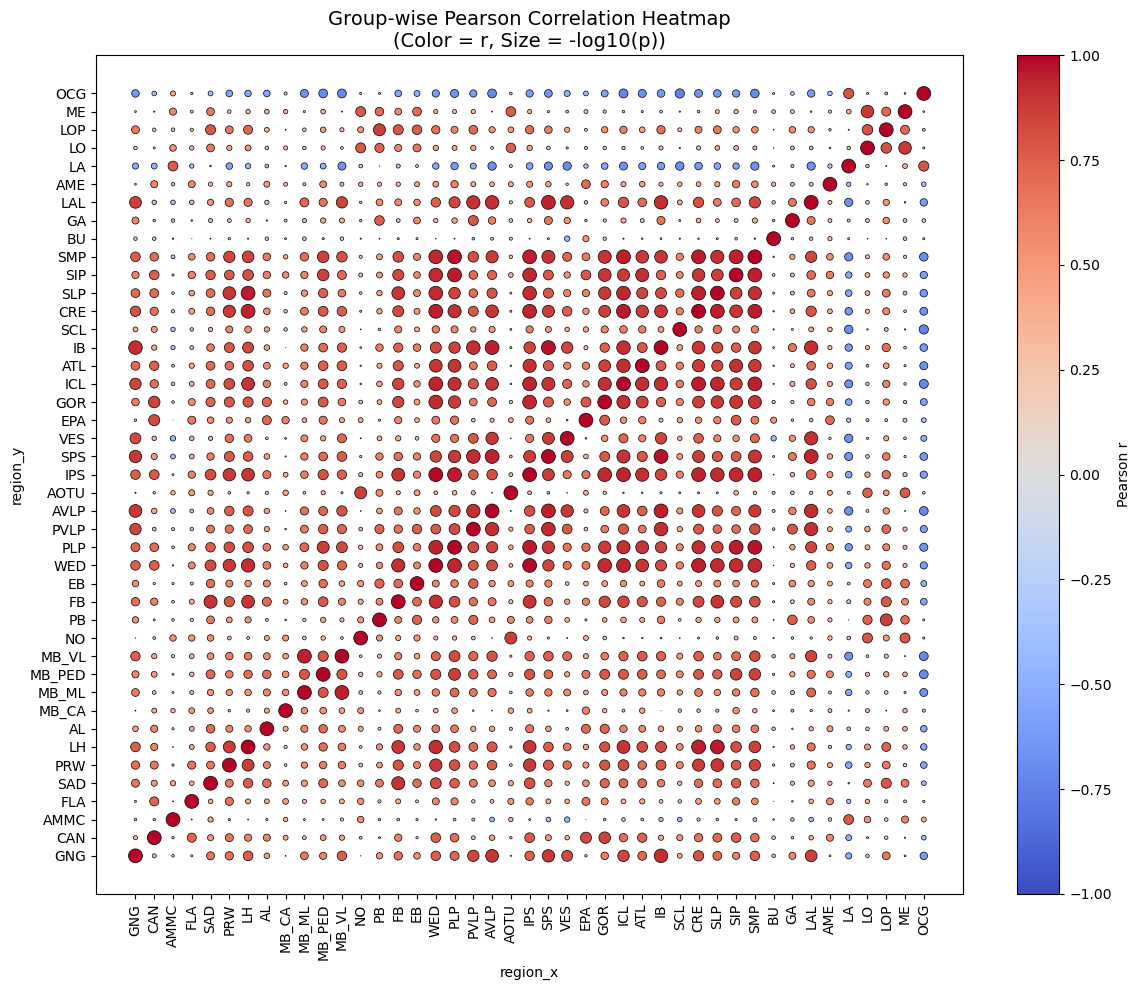

In [116]:
import matplotlib.colors as mcolors

region_order = [
    "GNG", "CAN", "AMMC", "FLA", "SAD", "PRW", "LH", "AL",
    "MB_CA", "MB_ML", "MB_PED", "MB_VL", "NO", "PB", "FB", "EB", "WED", "PLP",
    "PVLP", "AVLP", "AOTU", "IPS", "SPS", "VES", "EPA", "GOR", "ICL", "ATL", "IB", "SCL", "CRE",
    "SLP", "SIP", "SMP", "BU", "GA","LAL", "AME", "LA", "LO", "LOP", "ME", "OCG"
]

# Create a mapping from region name to axis index
region_to_index = {region: i for i, region in enumerate(region_order)}

# Filter the DataFrame to include only regions in the specified order
df_filtered = df_corr_morpho[
    df_corr_morpho["region_x"].isin(region_order) & df_corr_morpho["region_y"].isin(region_order)
].copy()

# Convert region names to axis indices
df_filtered["x_idx"] = df_filtered["region_x"].map(region_to_index)
df_filtered["y_idx"] = df_filtered["region_y"].map(region_to_index)

# Calculate point size based on -log10(p-value)
df_filtered["size"] = -np.log10(df_filtered["p"] + 1e-10)
df_filtered["size"] = df_filtered["size"] / df_filtered["size"].max() * 100

# Plotting
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Draw scatter plot
sc = ax.scatter(
    x=df_filtered["x_idx"],
    y=df_filtered["y_idx"],
    s=df_filtered["size"],
    c=df_filtered["r"],
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    edgecolor="black",
    linewidth=0.5
)

# Set axis tick labels to region names
ax.set_xticks(range(len(region_order)))
ax.set_xticklabels(region_order, rotation=90)
ax.set_yticks(range(len(region_order)))
ax.set_yticklabels(region_order)

# Axis labels and title
plt.xlabel("region_x")
plt.ylabel("region_y")
plt.title("Group-wise Pearson Correlation Heatmap\n(Color = r, Size = -log10(p))", fontsize=14)

# Add colorbar
norm = mcolors.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Pearson r")

plt.grid(False)
plt.tight_layout()
plt.show()

# Plot Difference

In [86]:
mean_corr_me = df_corr_me['r'].mean()
mean_corr_morpho = df_corr_morpho['r'].mean()

absolute_improvement = mean_corr_me - mean_corr_morpho
relative_improvement = (mean_corr_me - mean_corr_morpho) / abs(mean_corr_morpho) * 100

print(f"Average Improvement: {absolute_improvement:.4f}")
print(f"Relative improvement(%): {relative_improvement:.2f}%")

Average Improvement: 0.0825
Relative improvement(%): 19.21%


In [87]:
import pandas as pd

df_diff = df_corr_me.copy()
df_diff['r_diff'] = df_corr_me['r'] - df_corr_morpho['r']

heatmap_data = df_diff.pivot(index='region_x', columns='region_y', values='r_diff')

In [112]:
region_order = [
    "GNG", "CAN", "AMMC", "FLA", "SAD", "PRW", "LH", "AL",
    "MB_CA", "MB_ML", "MB_PED", "MB_VL", "NO", "PB", "FB", "EB", "WED", "PLP",
    "PVLP", "AVLP", "AOTU", "IPS", "SPS", "VES", "EPA", "GOR", "ICL", "ATL", "IB", "SCL", "CRE",
    "SLP", "SIP", "SMP", "BU", "GA","LAL", "AME", "LA", "LO", "LOP", "ME", "OCG"
]

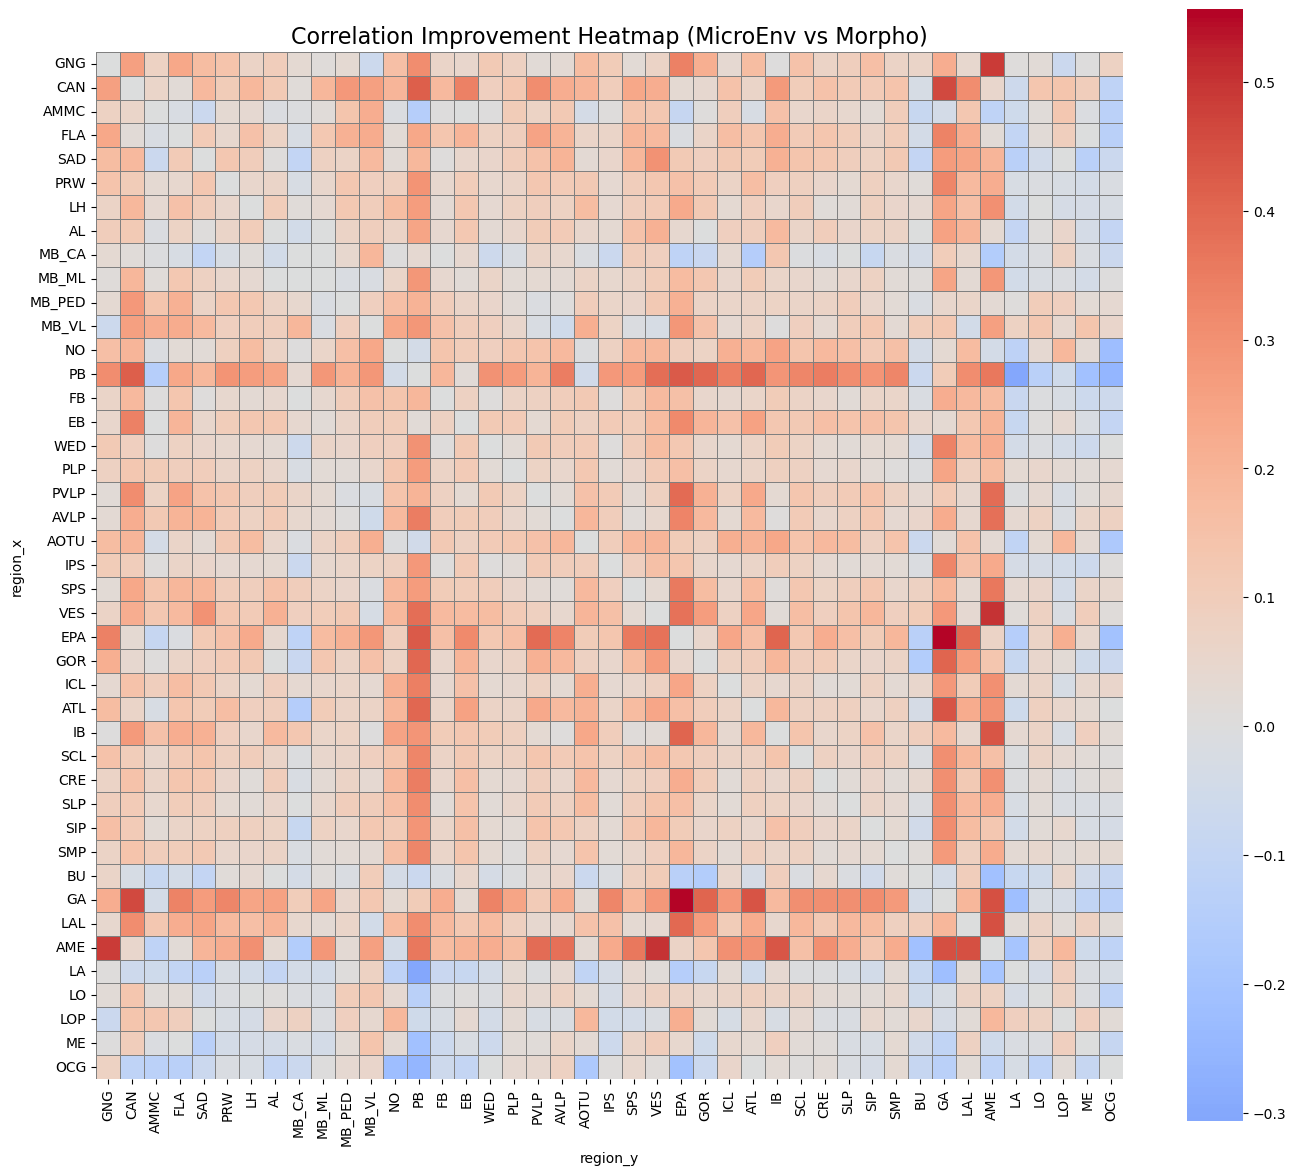

In [113]:
region_set = set(region_order)
df_filtered = df_diff[df_diff["region_x"].isin(region_set) & df_diff["region_y"].isin(region_set)]

heatmap_data = df_filtered.pivot(index="region_y", columns="region_x", values="r_diff")

heatmap_data = heatmap_data.reindex(index=region_order, columns=region_order)

plt.figure(figsize=(14, 12))
sns.heatmap(
    heatmap_data, 
    cmap='coolwarm', 
    center=0, 
    annot=False, 
    fmt=".2f",
    square=True, 
    linewidths=0.5, 
    linecolor='gray'
)
plt.title('Correlation Improvement Heatmap (MicroEnv vs Morpho)', fontsize=16)
plt.xlabel('region_y')
plt.ylabel('region_x')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()